# Import Library

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load Data

In [9]:
raw_data = pd.read_csv("births.csv")

In [10]:
raw_data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


## Data Preprocessing

In [11]:
raw_data.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [28]:
raw_data.isnull()

,year,month,day,gender,births,decade
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
15542,False,False,True,False,False,False
15543,False,False,True,False,False,False
15544,False,False,True,False,False,False
15545,False,False,True,False,False,False


In [29]:
raw_data.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
decade      0
dtype: int64

In [30]:
data_no_mv = raw_data.dropna(axis=0)

In [31]:
data_no_mv.describe(include = "all")

,year,month,day,gender,births,decade
count,15067.000000,15067.000000,15067.000000,15067,15067.000000,15067.000000
unique,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,F,NaN,NaN
freq,NaN,NaN,NaN,7536,NaN,NaN
mean,1978.417402,6.516427,17.769894,NaN,4678.631513,1973.924471
std,5.762018,3.449554,15.284034,NaN,1003.104707,5.834377
min,1969.000000,1.000000,1.000000,NaN,1.000000,1960.000000
25%,1973.000000,4.000000,8.000000,NaN,4344.000000,1970.000000
50%,1978.000000,7.000000,16.000000,NaN,4785.000000,1970.000000
75%,1983.000000,10.000000,24.000000,NaN,5247.000000,1980.000000


In [32]:
data_no_mv["decade"] = 10*(data_no_mv["year"]//10)
data_no_mv["decade"]

<ipython-input-32-080055d37aa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv["decade"] = 10*(data_no_mv["year"]//10)


0        1960
1        1960
2        1960
3        1960
4        1960
         ... 
15062    1980
15063    1980
15064    1980
15065    1980
15066    1980
Name: decade, Length: 15067, dtype: int64

In [33]:
data_pivot = data_no_mv.pivot_table("births", index="decade",columns="gender", aggfunc ="sum")
data_pivot

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,16336639,17171471


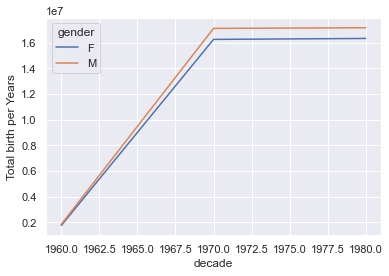

In [34]:
data_pivot.plot()
plt.ylabel("Total birth per Years")
plt.show()

In [41]:
quartiles = np.percentile(data_no_mv["births"],[25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [46]:
data_no_mv = data_no_mv.query("(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)")

In [48]:
data_no_mv['day'] = data_no_mv['day'].astype(int)
data_no_mv.index = pd.to_datetime(10000 * data_no_mv.year +
                              100 * data_no_mv.month +
                              data_no_mv.day, format='%Y%m%d')

data_no_mv['dayofweek'] = data_no_mv.index.dayofweek

<ipython-input-48-293d31bcf49b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['day'] = data_no_mv['day'].astype(int)
<ipython-input-48-293d31bcf49b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['dayofweek'] = data_no_mv.index.dayofweek


<ipython-input-49-71058519bf82>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


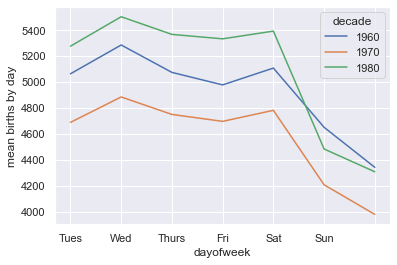

In [49]:
data_no_mv.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()